1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

From the plots it's possible to observe that there is no correlation between features_1, features_2 and features_3


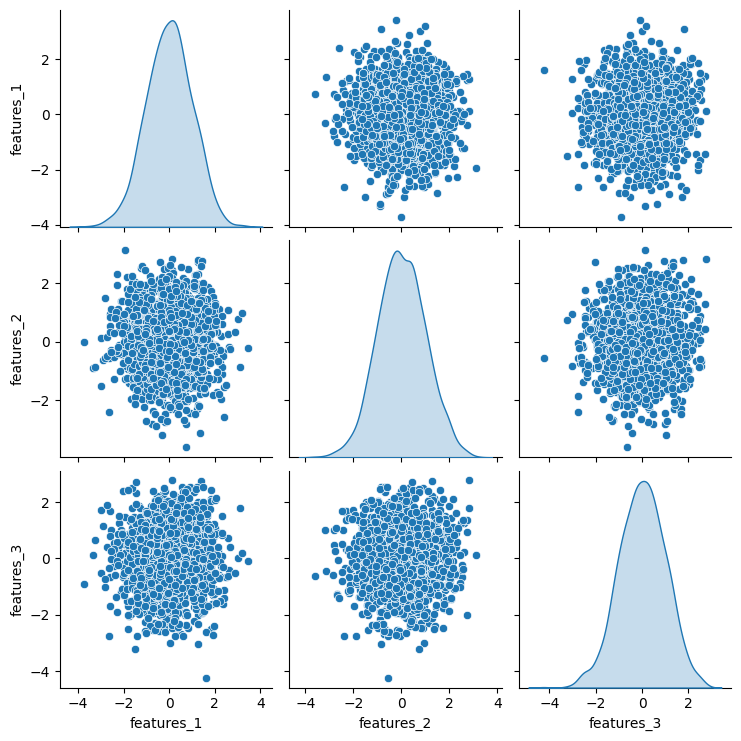

In [1]:
#!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv -P data/
import pandas as pd 
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

file_name= "data/regression_generated.csv"
data = pd.read_csv(file_name)

sns.pairplot(data, vars = ['features_1','features_2','features_3'], diag_kind = "kde")

print("From the plots it's possible to observe that there is no correlation between features_1, features_2 and features_3")



2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

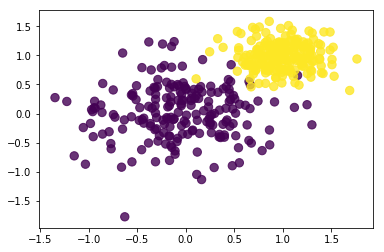

In [2]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

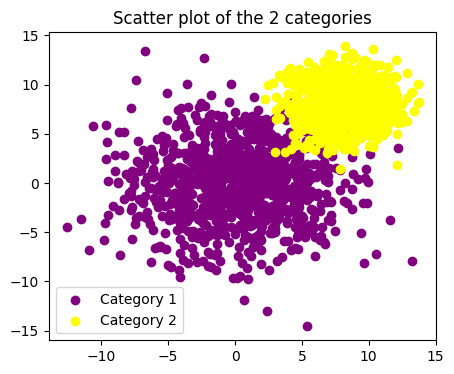

In [3]:
#function that generates a 2D dataset of 2 categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def dataset_gen(n_samples,mean1,std1,mean2,std2):
    
    df = pd.DataFrame({
        'x1' : np.random.normal(mean1, std1, n_samples),
        'y1' : np.random.normal(mean1, std1, n_samples),
        'x2' : np.random.normal(mean2, std2, n_samples),
        'y2' : np.random.normal(mean2, std2, n_samples),
    })

    return df

#display the dataset 
plt.figure(figsize=(5, 4))
df_data = dataset_gen(1000,0,4,8,2)

plt.scatter(df_data['x1'], df_data['y1'], color='purple', label='Category 1')
plt.scatter(df_data['x2'], df_data['y2'], color='yellow', label='Category 2')
plt.title('Scatter plot of the 2 categories')

plt.legend()
plt.show()
        

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

There is no correlation between the data
Plot with the regression


/home/aurorapeloso/.local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/aurorapeloso/.local/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/aurorapeloso/.local/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/aurorapeloso/.local/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/aurorapeloso/.local/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


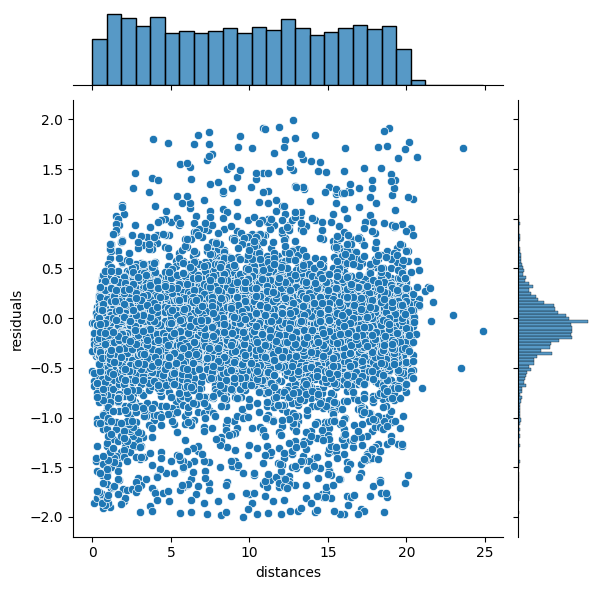

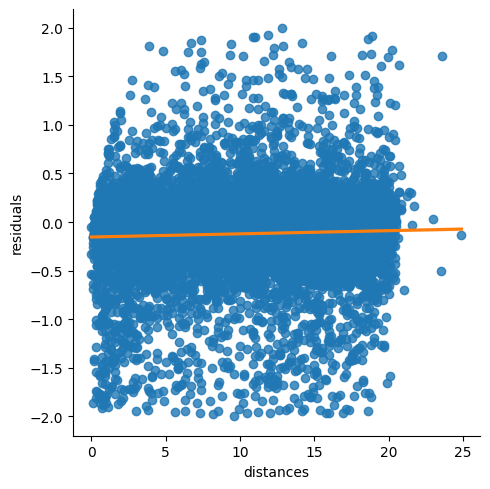

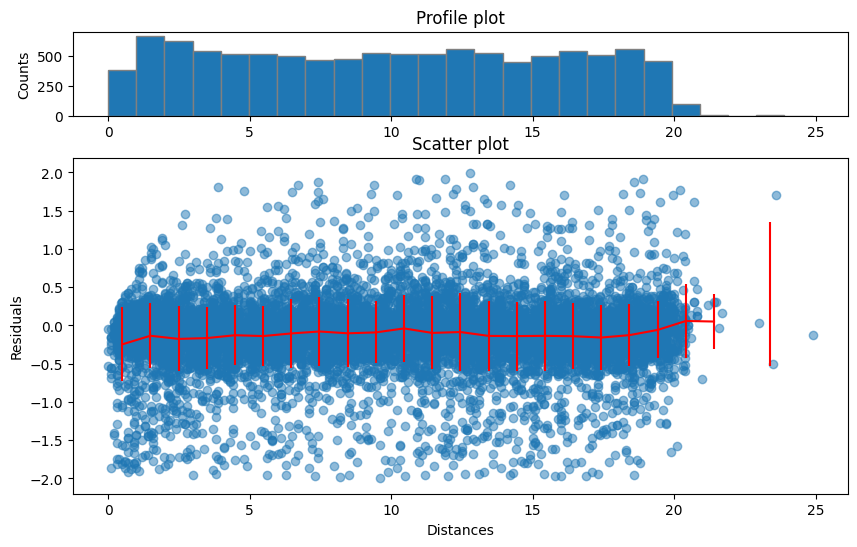

In [4]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
import pandas as pd
import pickle
import seaborn as sns
import numpy as np
filename = "data/residuals_261.pkl"

df = pd.read_pickle(filename, compression = 'infer')
df_list = df.tolist()

#Convert the content to a Pandas Dataframe
df_data = pd.DataFrame({
    'residuals' : df_list['residuals'],
    'distances' : df_list['distances'],
})

print("There is no correlation between the data")

#clean the sample ("residual" smaller than 2)
mask = abs(df_data['residuals']) < 2
filt_data = df_data[mask]

#plot a Seaborn jointplot of "residuals" versus "distances"
sns.jointplot(x="distances", y="residuals", data=filt_data)

#use seaborn to display a linear regression
print("Plot with the regression")
sns.lmplot(data=filt_data, x="distances", y="residuals",line_kws={"color": "C1"}) 
#sns.regplot(data=filt_data, x="distances", line_kws=dict(color="r"), y="residuals")

#Create manually (without using seaborn) the profile histogram for the distance
dist = np.array(df_data['residuals'])


dist = np.array(filt_data['distances'])

n_bins = 25

#find the edges 
edges = np.histogram_bin_edges(dist,n_bins)

#create the histogram
hist, _ = np.histogram(dist, edges)

#x --> the array of bin centers
x = (edges[:-1] + edges[1:])*0.5

#y --> mean value of residuals 
res = np.array(filt_data['residuals'])
y = np.array([np.mean(res[np.where((dist >= edges[i]) & (dist < edges[i+1]))]) for i in range(n_bins)])

#err_y -->standard deviation of the of the "residuals"
err_y = np.array([np.std(res[np.where((dist >= edges[i]) & (dist < edges[i+1]))]) for i in range(n_bins)])

fig1, ax1 = plt.subplots(nrows = 2, ncols = 1, figsize=(10, 6), gridspec_kw={'height_ratios':[5, 20]})
ax1[0].bar(x, hist, width=np.diff(edges)[0], edgecolor = "grey")
ax1[0].set_ylabel('Counts')
ax1[0].set_title('Profile plot')

ax1[1].scatter(dist,res,alpha = 0.5)
ax1[1].errorbar(x,y,yerr = err_y, fmt='-', color='red' )
ax1[1].set_xlabel('Distances')
ax1[1].set_ylabel('Residuals')
ax1[1].set_title('Scatter plot')
plt.show()


      

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


Integral of the histogram 173.23907498357661
Integral of the normalized gaussians 173.23907498357661


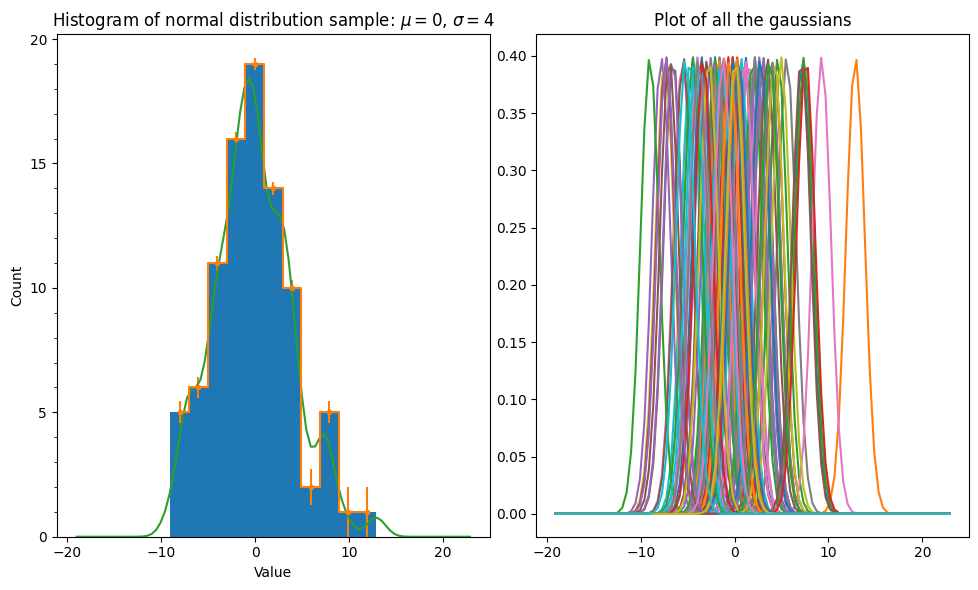

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
import numpy as np
from scipy.stats import norm
from scipy.integrate import trapz

mu = 0
sigma = 4
x = np.random.normal(loc=mu, scale=sigma, size=90)

num_bins = 11

fig, ax = plt.subplots(1,2,figsize=(10, 6))

h1, bins, _ = ax[0].hist(x, num_bins,cumulative=False)

#check if there is a meaningful number of bins
pois_unc = 1 / (h1**0.5)

#print(counts > pois_unc) should return True

#set labels
ax[0].set_xlabel('Value')
ax[0].set_ylabel('Count')
ax[0].set_title('Histogram of normal distribution sample: ' fr'$\mu={mu:.0f}$, $\sigma={sigma:.0f}$')

#set proper value of y axis major ticks labels 
ax[0].yaxis.set_major_locator(MultipleLocator(5))
ax[0].yaxis.set_minor_locator(AutoMinorLocator(5))
fig.tight_layout()

#display the histograms as data points with errors
bin_cent = 0.5 * (bins[1:] + bins[:-1])
ax[0].errorbar(bin_cent, h1, yerr = 1/(h1**0.5) , marker = '.', drawstyle = 'steps-mid')

#For every element of x, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned
#In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained

x_gaus = np.linspace(x.min()-10,x.max()+10,len(x))
def_sdt = 1.06 * x.std() * x.size**(-1/5)

gaus = np.zeros((len(x),len(x)))
ax[1].set_title('Plot of all the gaussians')
for i in range (len(x)):
    gaus[i,:] = norm.pdf(x_gaus, loc=x[i])
    ax[1].plot(x_gaus, gaus[i,:])

#Sum (with np.sum()) all the gaussian functions
gaus_sum = gaus.sum(axis = 0)

#normalize the gaussian
hist_int1 = trapz(h1, bin_cent)
gaus_norm = gaus_sum/len(x)*hist_int1

print("Integral of the histogram",hist_int1)
print("Integral of the normalized gaussians",trapz(gaus_norm,x = x_gaus))

##plot on the other graph
ax[0].plot(x_gaus, gaus_norm)

plt.show()